In [72]:
from recursive_solution import T as recursive_function
from dp_solution import T as dp_function
import time
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
from scipy.optimize import curve_fit

In [73]:
def generate_tree(n):
    tree = [None]
    for _ in range(n):
        tree.append(random.randint(1, 50))
    return tree

def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

def quadratic_regression(x, y, all_stats=False):
    popt, pcov = curve_fit(quadratic_function, x, y)
    a, b, c = popt
    f = np.poly1d([a, b, c])
    
    y_pred = f(x)
    y_mean = np.mean(y)
    ss_tot = np.sum((y - y_mean)**2)
    ss_res = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    if all_stats:
        return a, b, c, r_squared, pcov
    
    return r_squared


In [75]:
min_n = 2
max_n = 30
n_vals_recursive = range(min_n, max_n)
recursive_times = []

for n_val in n_vals_recursive:
    # Generate random tree
    tree = generate_tree(n_val)
    n = len(tree) - 1
    
    print("\n-----------------")
    print("n_val:", n_val)
    print("-----------------\n")
    
    print("\nRecursive Solution: ", end="")
    start_time = time.perf_counter()
    print(recursive_function(1, n, tree))
    end_time = time.perf_counter()
    
    runtime_str = "{:.6f}".format(end_time - start_time)
    print(f"Executed in {runtime_str} seconds\n")
    recursive_times.append(runtime_str)

recursive_df = pd.DataFrame({"n": n_vals_recursive, "runtime": recursive_times})

# Save recursive_df as csv file
filename = "recursive_df.csv"
recursive_df.to_csv(filename, index=False)

recursive_df



-----------------
n_val: 2
-----------------


Recursive Solution: 41
Executed in 0.000008 seconds


-----------------
n_val: 3
-----------------


Recursive Solution: 29
Executed in 0.000002 seconds


-----------------
n_val: 4
-----------------


Recursive Solution: 44
Executed in 0.000003 seconds


-----------------
n_val: 5
-----------------


Recursive Solution: 69
Executed in 0.000004 seconds


-----------------
n_val: 6
-----------------


Recursive Solution: 107
Executed in 0.000006 seconds


-----------------
n_val: 7
-----------------


Recursive Solution: 83
Executed in 0.000011 seconds


-----------------
n_val: 8
-----------------


Recursive Solution: 141
Executed in 0.000018 seconds


-----------------
n_val: 9
-----------------


Recursive Solution: 90
Executed in 0.000036 seconds


-----------------
n_val: 10
-----------------


Recursive Solution: 196
Executed in 0.000063 seconds


-----------------
n_val: 11
-----------------


Recursive Solution: 194
Executed in 0.

,n,runtime
0,2,0.000008
1,3,0.000002
2,4,0.000003
3,5,0.000004
4,6,0.000006
5,7,0.000011
6,8,0.000018
7,9,0.000036
8,10,0.000063
9,11,0.000132


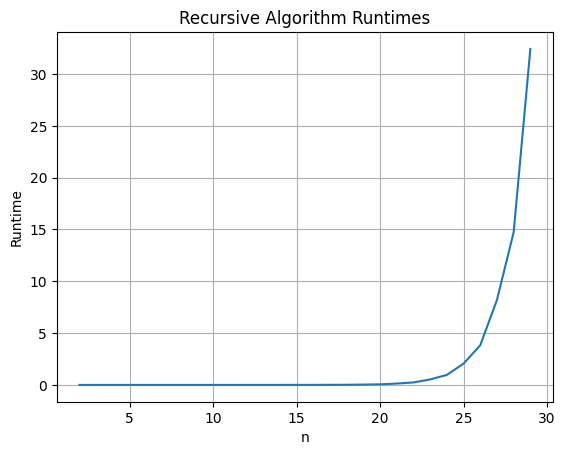

In [65]:
plt.plot(n_vals_recursive, recursive_times)
plt.title("Recursive Algorithm Runtimes")
plt.xlabel("n")
plt.ylabel("Runtime")
plt.grid(True)
plt.show()

In [69]:
min_n = 10
max_n = 2000
num_n = 50
n_vals_dp = range(min_n, max_n, (max_n - min_n) // num_n)
dp_times = []

for n_val in n_vals_dp:
    # Generate random tree
    tree = generate_tree(n_val)
    n = len(tree) - 1
    
    print("\n-----------------")
    print("n_val:", n_val)
    print("-----------------\n")
    
    print("DP Solution: ", end="")
    start_time = time.perf_counter()
    print(dp_function(tree)[0][0][n-1])
    end_time = time.perf_counter()
    runtime_str = "{:.6f}".format(end_time - start_time)
    print(f"Executed in {runtime_str} seconds\n")
    dp_times.append(runtime_str)
    
dp_df = pd.DataFrame({"n": n_vals_dp, "runtime": dp_times})

# Save dp_df as csv file
filename = "dp_df.csv"
dp_df.to_csv(filename, index=False)

dp_df


-----------------
n_val: 10
-----------------

DP Solution: 143
Executed in 0.000058 seconds


-----------------
n_val: 49
-----------------

DP Solution: 557
Executed in 0.000543 seconds


-----------------
n_val: 88
-----------------

DP Solution: 1169
Executed in 0.001740 seconds


-----------------
n_val: 127
-----------------

DP Solution: 1662
Executed in 0.004539 seconds


-----------------
n_val: 166
-----------------

DP Solution: 2068
Executed in 0.007943 seconds


-----------------
n_val: 205
-----------------

DP Solution: 2637
Executed in 0.013098 seconds


-----------------
n_val: 244
-----------------

DP Solution: 2955
Executed in 0.016615 seconds


-----------------
n_val: 283
-----------------

DP Solution: 3295
Executed in 0.019632 seconds


-----------------
n_val: 322
-----------------

DP Solution: 4341
Executed in 0.026073 seconds


-----------------
n_val: 361
-----------------

DP Solution: 4572
Executed in 0.030423 seconds


-----------------
n_val: 400
-----

,n,runtime
0,10,0.000058
1,49,0.000543
2,88,0.001740
3,127,0.004539
4,166,0.007943
5,205,0.013098
6,244,0.016615
7,283,0.019632
8,322,0.026073
9,361,0.030423


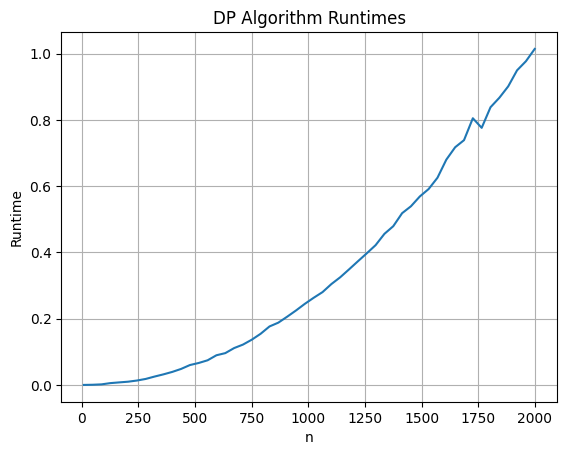

In [67]:
plt.plot(n_vals_dp, dp_times)
plt.title("DP Algorithm Runtimes")
plt.xlabel("n")
plt.ylabel("Runtime")
plt.grid(True)
plt.show()

In [61]:
# r_squared = quadratic_regression(np.array(n_vals_recursive), np.array(recursive_times))
# print("Recursive R-squared value:", r_squared)

a, b, c, r_squared, pcov = quadratic_regression(np.array(n_vals_dp), np.array(dp_times), all_stats=True)
print("DP R-squared value:", r_squared)

quadratic_function = np.poly1d([a, b, c])
print(f"quadratic_function: {quadratic_function}")
print(a, b, c)

quadratic_function_values = []
for n_val in n_vals_dp:
    y_val = quadratic_function(n_val)
    quadratic_function_values.append(y_val)

ValueError: Unable to determine number of fit parameters.

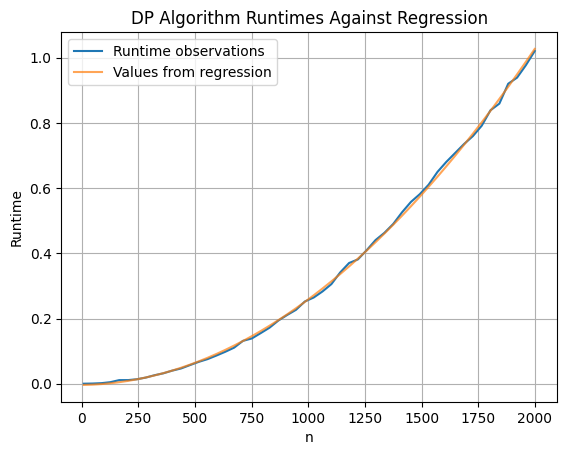

In [59]:
plt.plot(n_vals_dp, dp_times, label="Runtime observations")
plt.plot(n_vals_dp, quadratic_function_values, label="Values from regression", alpha=0.7)
plt.title("DP Algorithm Runtimes Against Regression")
plt.xlabel("n")
plt.ylabel("Runtime")
plt.grid(True)
plt.legend()
plt.show()